In [6]:
from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import fastsca
from sklearn.metrics.cluster import contingency_matrix,adjusted_rand_score
import matplotlib.pylab as plt
import seaborn as sns
np.random.seed(42)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sca = fastsca.FASTSCA()
sca.config = args
sca.initdata()
fn = sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id

In [ ]:


df_gt = pd.read_csv(fn+'_metadata.csv.gz')
df_tl = pd.read_csv(fn+'_scanpy_label.csv.gz')
df_join = pd.merge(df_tl,df_gt,on='cell',how='left')
print('ARI',adjusted_rand_score(df_join.label_y,df_join.label_x))
df_scmatch = pd.DataFrame(contingency_matrix(df_join.label_x,df_join.label_y))
df_scmatch = df_scmatch.div(df_scmatch.sum(axis=1), axis=0)
sns.distplot(df_scmatch.max(1).values,hist=False)
plt.xlabel('Proportion of cell type')
plt.ylabel('Leiden group count')

print('clust_max',df_scmatch.max(1).sum()/df_scmatch.shape[0])


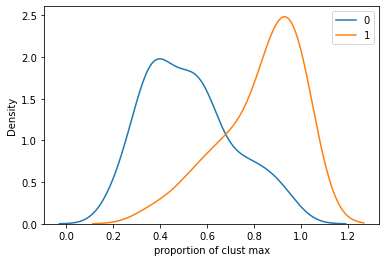

In [19]:
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv(fn+'_cluster_trace.csv.gz')

for i in range(df.shape[0]):
    sns.distplot(df.iloc[i,:],label=i,hist=False)
plt.xlabel('proportion of clust max')
plt.legend()


In [20]:
dfv = pd.read_csv(fn+'_cluster_val_trace.csv.gz')
dfv

,dim,cmax,adj_rs,cal_sc,dav_sc
0,121,0.521764,0.023395,35.952763,17.330502
1,27,0.827497,0.306134,85.313389,10.108014
2,20,0.803898,0.238710,63.763694,12.320844


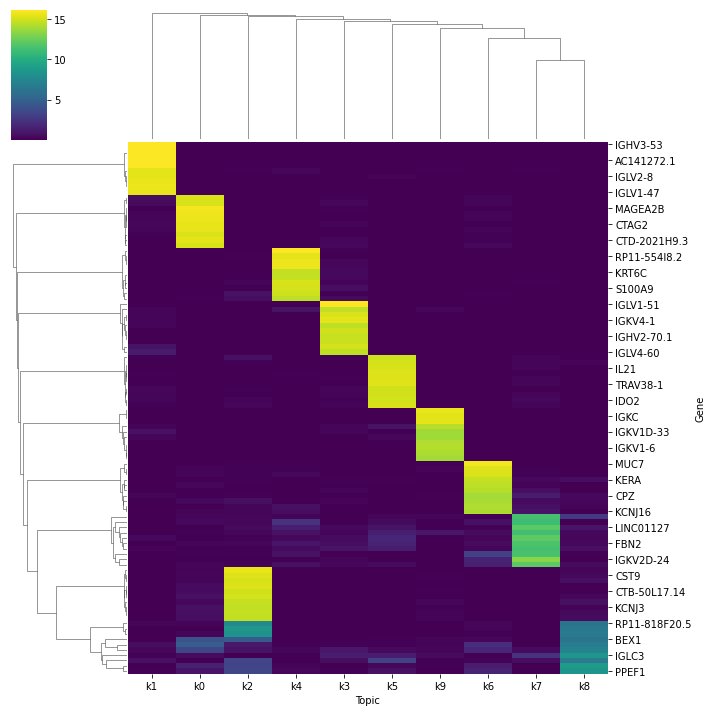

In [21]:
import _topics_util as tpu 
import matplotlib.pylab as plt
import seaborn as sns

dfh = pd.read_csv(fn+'_1_beta.csv.gz')

dfh.columns = sca.data.cols
df_top = tpu.get_topic_top_genes(dfh,10)

df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [ ]:

df = pd.read_csv(fn+'_cluster_val_trace.csv.gz')
df

In [ ]:
import _topics_util as tpu 
import matplotlib.pylab as plt
import seaborn as sns

dfh = pd.read_csv(fn+'_10_beta.csv.gz')

dfh.columns = sca.data.cols
df_top = tpu.get_topic_top_genes(dfh,20)

df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv(fn+'_cluster_trace_NMF.csv.gz')

for i in range(df.shape[0]):
    sns.distplot(df.iloc[i,:],label=i,hist=False)
plt.xlabel('proportion of clust max')
plt.legend()

In [ ]:
dfv = pd.read_csv(fn+'_cluster_val_trace_NMF.csv.gz')
dfv